### Reading the Dataset

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv("heart_disease_dataset.csv")

In [20]:
df.head(n=10)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0
5,77,Male,309,110,73,Never,NaN,0,No,Yes,Yes,4,122,Yes,Asymptomatic,1
6,64,Female,211,105,86,Former,Heavy,8,Yes,Yes,Yes,2,120,No,Typical Angina,1
7,60,Female,208,148,83,Never,Moderate,4,No,Yes,Yes,2,113,Yes,Asymptomatic,1
8,37,Female,317,137,66,Current,Heavy,3,No,Yes,Yes,5,114,No,Non-anginal Pain,0
9,63,Male,204,141,68,Former,Heavy,8,No,Yes,No,3,107,No,Asymptomatic,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

### Data Cleaning

In [22]:
#Removing the samples which has null values
import numpy as np

# Replace blanks or specific strings with NaN
df = df.replace(["", " ", "NA", "None"], np.nan)

# Now drop rows with null values
df_dropped = df.dropna()

In [23]:
#Removing some feature which may not help our study
df = df_dropped.drop(['Family History', 'Blood Sugar','Exercise Induced Angina','Chest Pain Type'], axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 660 entries, 0 to 997
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             660 non-null    int64 
 1   Gender          660 non-null    object
 2   Cholesterol     660 non-null    int64 
 3   Blood Pressure  660 non-null    int64 
 4   Heart Rate      660 non-null    int64 
 5   Smoking         660 non-null    object
 6   Alcohol Intake  660 non-null    object
 7   Exercise Hours  660 non-null    int64 
 8   Diabetes        660 non-null    object
 9   Obesity         660 non-null    object
 10  Stress Level    660 non-null    int64 
 11  Heart Disease   660 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 67.0+ KB


### Feature Engineering

In [25]:
#Converting the feature names according to simple usage
df.columns

Index(['Age', 'Gender', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
       'Smoking', 'Alcohol Intake', 'Exercise Hours', 'Diabetes', 'Obesity',
       'Stress Level', 'Heart Disease'],
      dtype='object')

In [26]:
df.columns = df.columns.str.lower().str.replace(" ", "_")


In [27]:
df.columns

Index(['age', 'gender', 'cholesterol', 'blood_pressure', 'heart_rate',
       'smoking', 'alcohol_intake', 'exercise_hours', 'diabetes', 'obesity',
       'stress_level', 'heart_disease'],
      dtype='object')

### Exploratory Data Analysis

##### Majorly concerating the relation between the stress level and heart disease

In [28]:
#Constructing Different Plots to Identify the Relation
import matplotlib.pyplot as plt

#### Scatter Plot

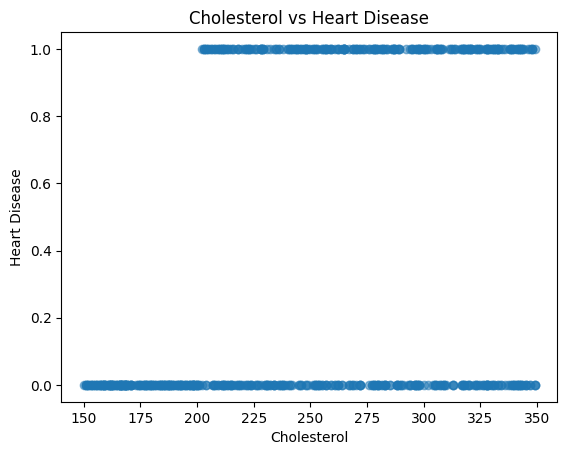

In [12]:
plt.scatter(df["cholesterol"], df["heart_disease"], alpha=0.5)
plt.xlabel("Cholesterol")
plt.ylabel("Heart Disease")
plt.title("Cholesterol vs Heart Disease")
plt.show()

##### Cholesterol by itself doesn’t strongly determine heart disease risk in this data.

#### Box Plot

Text(0.5, 1.0, 'Cholesterol vs Heart Disease')

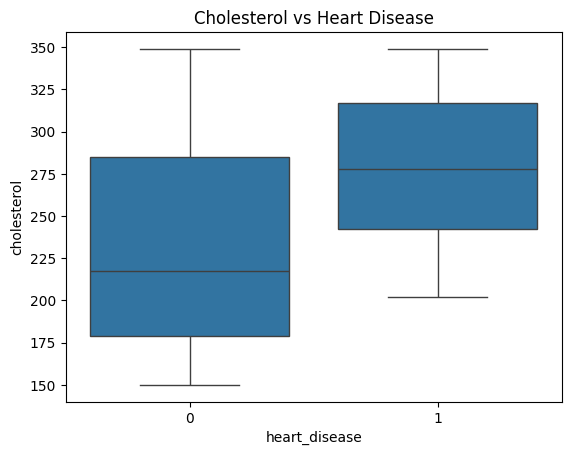

In [13]:
import seaborn as sns

sns.boxplot(x="heart_disease", y="cholesterol", data=df)
plt.title("Cholesterol vs Heart Disease")

##### Individuals with heart disease generally have higher cholesterol levels compared to those without.

#### Histogram

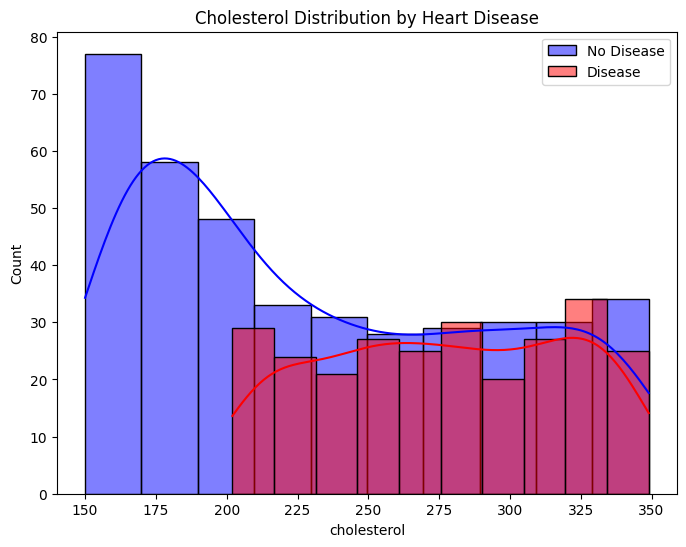

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(df[df["heart_disease"]==0]["cholesterol"], label="No Disease", kde=True, color="blue", alpha=0.5)
sns.histplot(df[df["heart_disease"]==1]["cholesterol"], label="Disease", kde=True, color="red", alpha=0.5)
plt.legend()
plt.title("Cholesterol Distribution by Heart Disease")
plt.show()


#### Heatmap

In [15]:
df["gender"] = df["gender"].replace({"Female": 1, "Male": 2})
df["smoking"] = df["smoking"].replace({"Never": 1, "Former": 0, "Current":2})
df["alcohol_intake"] = df["alcohol_intake"].replace({"Heavy": 1, "Moderate": 0})
df["diabetes"] = df["diabetes"].replace({"Yes": 1, "No": 0})
df["obesity"] = df["obesity"].replace({"Yes": 1, "No": 0})

C:\Users\kavia\AppData\Local\Temp\ipykernel_7448\4068638138.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["gender"] = df["gender"].replace({"Female": 1, "Male": 2})
C:\Users\kavia\AppData\Local\Temp\ipykernel_7448\4068638138.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["smoking"] = df["smoking"].replace({"Never": 1, "Former": 0, "Current":2})
C:\Users\kavia\AppData\Local\Temp\ipykernel_7448\4068638138.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To

In [16]:
df_correlations = df.corr()

<Axes: >

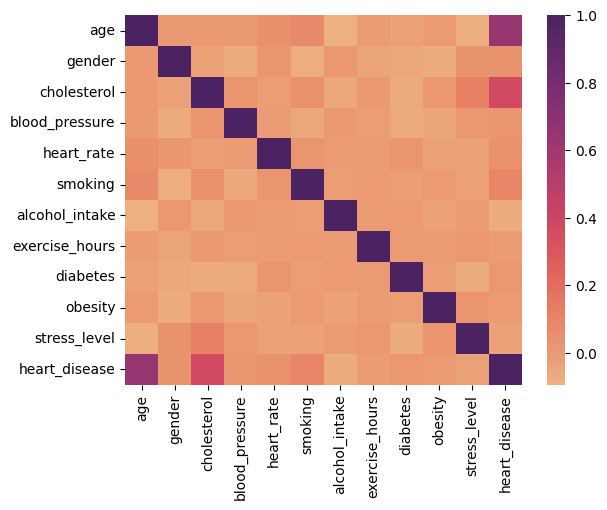

In [17]:
sns.heatmap(df_correlations, cmap="flare")

##### From the heatmap we get to know that cholesterol is postively corelated with heart disease. Which makes to agree with the box plot result

#### Subplot Grit or Multi-plot Dashboard

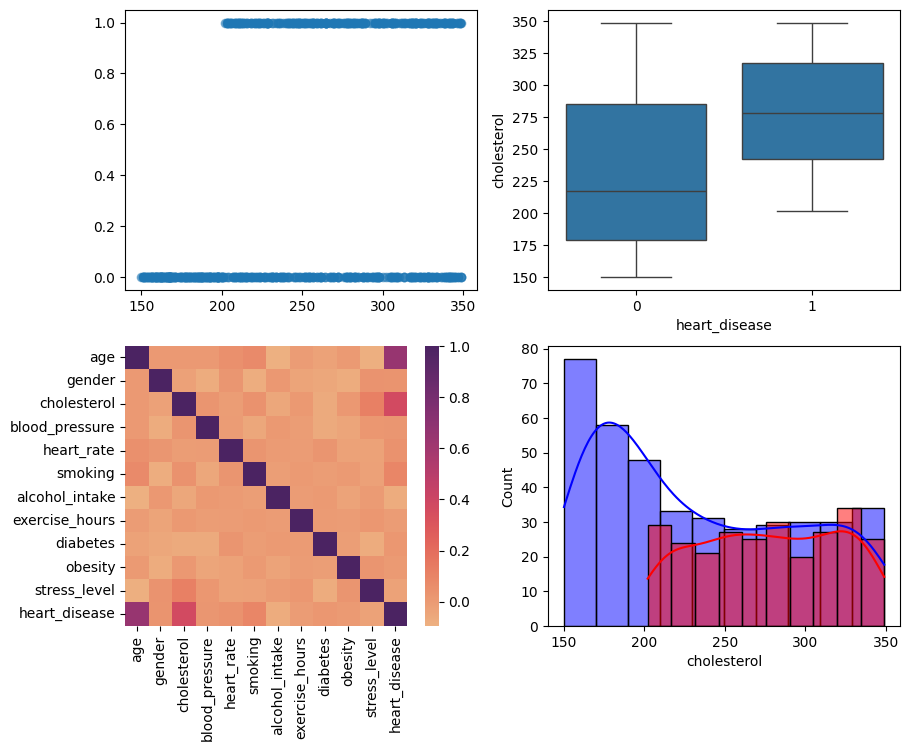

<Figure size 640x480 with 0 Axes>

In [83]:
#Showcasing the plots in one chart

fig, axes = plt.subplots(2, 2, figsize=(10,8))
axes[0][0].scatter(df["cholesterol"], df["heart_disease"], alpha=0.5)
sns.boxplot(x="heart_disease", y="cholesterol", data=df, ax=axes[0][1])
sns.histplot(df[df["heart_disease"]==0]["cholesterol"], label="No Disease", kde=True, color="blue", alpha=0.5, ax=axes[1][1])
sns.histplot(df[df["heart_disease"]==1]["cholesterol"], label="Disease", kde=True, color="red", alpha=0.5, ax=axes[1][1])
sns.heatmap(df_correlations, cmap="flare" , ax=axes[1][0])
plt.show()
plt.savefig("eda_results.png")

##### From all the above plots, we get to know that higher the cholesterol increases the chances of getting heart disease. But it is not only the main source of heart disease.

### Preparing Data For ML

In [34]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()

numeric_cols = ['cholesterol','blood_pressure']  

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df)


          age  gender  cholesterol  blood_pressure  heart_rate  smoking  \
0    0.925926  Female     0.391960        0.325843          66  Current   
2    0.518519    Male     0.422111        0.011236          67    Never   
6    0.722222  Female     0.306533        0.168539          86   Former   
7    0.648148  Female     0.291457        0.651685          83    Never   
8    0.222222  Female     0.839196        0.528090          66  Current   
..        ...     ...          ...             ...         ...      ...   
991  0.018519  Female     0.326633        0.112360          74    Never   
992  0.055556  Female     0.351759        0.134831          73  Current   
994  0.500000    Male     0.492462        0.775281          76   Former   
995  0.574074  Female     0.597990        0.235955          86    Never   
997  1.000000    Male     0.005025        1.000000          81    Never   

    alcohol_intake  exercise_hours diabetes obesity  stress_level  \
0            Heavy            

In [33]:
from sklearn.model_selection import train_test_split

In [37]:
ml_split_dataset = train_test_split(df )

# Training Data
train_data = ml_split_dataset[0]
print(len(ml_split_dataset[0]))

# Testing Data
test_data = ml_split_dataset[1]
print(len(ml_split_dataset[1]))

495
165


### Creating ML Model Algorithm

In [42]:
from sklearn.preprocessing import LabelEncoder

# Example: convert categorical columns into numbers
encoder = LabelEncoder()

for col in train_data.select_dtypes(include=['object']).columns:
    train_data[col] = encoder.fit_transform(train_data[col])
    test_data[col] = encoder.transform(test_data[col])


In [ ]:
train_data = pd.get_dummies(train_data, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)

test_data = test_data.reindex(columns=train_data.columns, fill_value=0)


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

model1 = DecisionTreeClassifier().fit(X = train_data.drop(columns=["heart_disease"]), y = train_data["heart_disease"])
model2 = SVC().fit(X = train_data.drop(columns=["heart_disease"]), y = train_data["heart_disease"])

In [45]:
y_predicted_model1 = model1.predict(X = test_data.drop(columns=["heart_disease"]))
y_predicted_model2 = model2.predict(X = test_data.drop(columns=["heart_disease"]))

In [46]:
y_true = test_data["heart_disease"]

### Prediction of ML Model 

In [47]:
from sklearn.metrics import confusion_matrix

#confusion_matrix(y_true, y_predicted_model1)

tn, fp, fn, tp = confusion_matrix(y_true, y_predicted_model1).ravel()
print("------------------------")
print("Confusion Matrix output - model-1 (DecisionTreeClassifier)")
print("------------------------")
print("tn - True Negative", tn)
print("fp - False Positive", fp)
print("fn - False Negative", fn)
print("tp - True Positive", tp)

tn, fp, fn, tp = confusion_matrix(y_true, y_predicted_model2).ravel()
print("------------------------")
print("Confusion Matrix output - model-2 (SVC - Support Vector Classifier)")
print("------------------------")
print("tn - True Negative", tn)
print("fp - False Positive", fp)
print("fn - False Negative", fn)
print("tp - True Positive", tp)

------------------------
Confusion Matrix output - model-1 (DecisionTreeClassifier)
------------------------
tn - True Negative 99
fp - False Positive 1
fn - False Negative 0
tp - True Positive 65
------------------------
Confusion Matrix output - model-2 (SVC - Support Vector Classifier)
------------------------
tn - True Negative 100
fp - False Positive 0
fn - False Negative 65
tp - True Positive 0


In [48]:
test_data["heart_disease"].value_counts()

heart_disease
0    100
1     65
Name: count, dtype: int64

### Result

In [49]:
# model-1 (DecisionTreeClassifier)

TN=32 ; FP=9 ; FN=4 ; TP=33

accuracy = round((TP+TN) / (TP+TN+FP+FN), 2)
precision = round(TP / (TP + FP), 2)
recall = round(TP / (TP + FN), 2)
F1_score = round((2 * TP) / ((2 * TP) + FP + FN), 2)

print(f"Model-1 metrics --> Accuracy:{accuracy} | Precision:{precision} | Recall:{recall} | F1 score:{F1_score}")

######################################################

# model-2 (SVC - Support Vector Classifier)

TN=20 ; FP=21 ; FN=0 ; TP=37

accuracy = round((TP+TN) / (TP+TN+FP+FN), 2)
precision = round(TP / (TP + FP), 2)
recall = round(TP / (TP + FN), 2)
F1_score = round((2 * TP) / ((2 * TP) + FP + FN), 2)

print(f"Model-2 metrics --> Accuracy:{accuracy} | Precision:{precision} | Recall:{recall} | F1 score:{F1_score}")

Model-1 metrics --> Accuracy:0.83 | Precision:0.79 | Recall:0.89 | F1 score:0.84
Model-2 metrics --> Accuracy:0.73 | Precision:0.64 | Recall:1.0 | F1 score:0.78


**Out of the two models we trained, the Decision Tree Classifier (Model 1) performed better compared to the Support Vector Classifier (Model 2). This indicates that the Decision Tree is more effective in capturing the relationship between cholesterol (and other features) and heart disease in our dataset.**